In [1]:
import pandas as pd
import numpy as np
import csv
import math
from sklearn.linear_model import PassiveAggressiveRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime, timedelta
from pykrige.ok import OrdinaryKriging
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# import xgboost as xgb

import constants




# LOAD DATA

In [2]:
# staticData = load_static_data()
# staticData = transform_to_grid_coordinates(staticData)
# mobileData = load_mobile_sensors()
# mobileData = transform_to_grid_coordinates(mobileData)
# allData = pd.concat([staticData, mobileData], ignore_index=True)
# setIds(staticData)
# setIds(allData)
# allData

with open("all_data_15_min_50_grid.txt", "rb") as fp:   # Unpickling
    all_data = pickle.load(fp)


In [3]:

all_data

PM1     PM2.5      PM10  temperature   humidity        lat  \
6      0.560021  1.047775  1.250596    15.442787  81.600532  55.945433   
7      0.638649  1.085895  1.442452    15.610231  80.723547  55.945302   
8      0.673539  1.197392  1.617458    14.926126  84.561992  55.943003   
9      0.620221  1.092234  1.629773    15.181242  83.022128  55.943014   
10     0.895199  1.526833  2.664416    14.441266  84.864674  55.940953   
11     1.254870  3.585423  9.134979    14.800000  85.000000  55.939772   
12     0.594983  1.081502  1.236340    15.278152  82.272694  55.945433   
13     0.645609  1.095115  1.605650    15.542360  81.116362  55.945302   
14     0.777514  1.409194  1.736277    14.793450  85.656753  55.943003   
15     0.767814  1.320456  1.917637    15.112393  83.698152  55.943014   
16     0.949525  1.548433  2.037688    14.305348  85.897248  55.940953   
17     1.158573  2.869808  6.100941    14.633333  85.933333  55.939772   
18     0.572878  1.076748  1.264464    15.146444  83.280938  55.945433   
19     0.623697  1.039181  1.961124    15.508425  81.214566  55.945302   
20     0.723218  1.281975  1.758719    14.660773  86.486117  55.943003   
21     0.596537  0.991517  1.201364    15.009119  83.826918  55.943014   
22     0.916246  1.501734  1.885316    14.237389  86.090856  55.940953   
23     0.978903  2.450162  4.467242    14.566667  85.266667  55.939772   
24     0.634167  1.148729  1.332896    15.014736  83.785060  55.945433   
25     0.608724  1.021317  1.444771    15.406619  81.607381  55.945302   
26     0.645474  1.092067  1.421185    14.594435  85.988499  55.943003   
27     0.591073  0.961168  1.391346    14.940270  83.633769  55.943014   
28     0.816105  1.310575  2.066661    14.135451  87.155698  55.940953   
29     0.907882  2.450709  4.262180    14.533333  85.066667  55.939772   
30     0.530635  0.927738  1.023388    15.014736  83.785060  55.945433   
31     0.602081  0.953537  1.334692    15.372684  81.771054  55.945302   
32     0.703685  1.143884  1.209969    14.528096  87.083260  55.943003   
33     0.609030  0.936730  1.143765    14.940270  83.794727  55.943014   
34     0.748762  1.166119  1.253164    14.135451  85.929516  55.940953   
35     0.760268  1.756608  2.825066    14.466667  85.433333  55.939772   
...         ...       ...       ...          ...        ...        ...   
13666  0.337432  0.573703  0.621376    14.915954  62.981630  55.945433   
13667  1.060146  1.529237  2.567466    14.965461  61.933881  55.945302   
13668  0.389904  0.649267  0.890559    13.765205  68.969942  55.943003   
13669  0.526182  0.794788  1.397757    14.802571  62.870189  55.943014   
13670  0.391631  0.682997  0.808305    13.625759  67.956275  55.940953   
13671  0.457621  1.153547  2.683512    14.300000  64.366667  55.939772   
13672  0.376060  0.664763  0.967030    14.817173  63.620184  55.945433   
13673  1.147724  1.691334  3.653586    14.965461  61.802943  55.945302   
13674  0.389824  0.668781  0.736942    13.698867  68.903592  55.943003   
13675  0.565068  0.840383  1.044958    14.871421  62.741422  55.943014   
13676  0.397982  0.684628  1.019147    13.625759  68.827510  55.940953   
13677  0.488490  1.453491  3.877101    14.233333  65.300000  55.939772   
13678  0.366721  0.654691  1.198108    14.718392  63.552968  55.945433   
13679  1.619333  2.334248  5.414853    14.999396  61.802943  55.945302   
13680  0.705380  1.082650  1.283132    13.632529  68.770894  55.943003   
13681  0.584606  0.871271  1.185321    14.836996  63.063338  55.943014   
13682  0.332974  0.577010  0.757134    13.523821  68.440294  55.940953   
13683  0.402806  1.100533  2.090319    14.233333  65.000000  55.939772   
13684  0.268175  0.464024  0.516704    14.487903  62.948022  55.945433   
13685  1.139189  1.608881  2.842239    14.829719  61.737473  55.945302   
13686  0.353748  0.572370  0.693338    13.433514  68.405974  55.943003   
13687  0.504671  0.743809  1.120246    14.802571  62.387315  55.943014   
13688  0.335197 

# Model Functions

In [4]:
#TODO add params for activations, num layers, width of layers, optimizer, loss function, learning rate, batch size
def createStationaryModel():
    online_model = tf.keras.Sequential([
        layers.Dense(12, activation=tf.nn.relu, input_shape=[len(constants.CONTINUOUS_TRAINING_FEATURES)]),
        layers.Dense(16, activation=tf.nn.relu),
#         layers.Dense(16, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    online_optimizer = tf.keras.optimizers.Adam(0.00001)

    online_model.compile(loss='mean_absolute_error',
        optimizer=online_optimizer,
        metrics=['mean_absolute_error', 'mean_squared_error'])
    
    online_model_w_prev = tf.keras.Sequential([
        layers.Dense(12, activation=tf.nn.relu, input_shape=[len(constants.CONTINUOUS_TRAINING_FEATURES_W_PREV)]),
        layers.Dense(16, activation=tf.nn.relu),
#         layers.Dense(16, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    online_w_prev_optimizer = tf.keras.optimizers.Adam(0.00001)

    online_model_w_prev.compile(loss='mean_absolute_error',
        optimizer=online_w_prev_optimizer,
        metrics=['mean_absolute_error', 'mean_squared_error'])
    
    par = PassiveAggressiveRegressor(C=1, epsilon=0.1, loss='epsilon_insensitive', max_iter=100, random_state=0,tol=1e-3)
    
    return online_model, online_model_w_prev, par


In [5]:
online_model, online_model_w_prev, par_model = createStationaryModel()

Instructions for updating:
Colocations handled automatically by placer.


# Train

In [6]:
def updateModels(data, label):
    X1 = data[constants.CONTINUOUS_TRAINING_FEATURES]
    X2 = data[constants.CONTINUOUS_TRAINING_FEATURES_W_PREV]
    label = np.array([label])
    online_model.fit(
        X1, label, batch_size=len(X1),
        epochs=200, verbose=0)
    
    online_model_w_prev.fit(
        X2, label, batch_size=len(X2),
        epochs=200, verbose=0)

    par_model.partial_fit(X1, label)
                
def trainNNs(trainData):
    
    class PrintDot(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs):
            if epoch % 100 == 0: print('')
            print('.', end='')
                
    
        
    X1 = trainData[constants.CONTINUOUS_TRAINING_FEATURES]
    X2 = trainData[constants.CONTINUOUS_TRAINING_FEATURES_W_PREV]
    labels = trainData.pop('next_pm_2.5')
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

    par_model.fit(X1, labels)

    history = online_model.fit(
        X1, labels, batch_size=16,
        epochs=1000, verbose=0, validation_split = .2, callbacks=[ early_stop, PrintDot()])
    
    history = online_model_w_prev.fit(
        X2, labels, batch_size=16,
        epochs=1000, verbose=0, validation_split = .2, callbacks=[ early_stop, PrintDot()])

    plot_history(history)
    hist = pd.DataFrame(history.history)
    display(hist)
    
        
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()

In [7]:
# all_data = all_data.assign(nextPM=all_data['PM2.5'].shift(-3))
# all_data['minute'] = all_data.apply(lambda row: datetime.strptime(row.Timestamp[:19], '%Y-%m-%d %H:%M:%S').minute, axis=1)
# staticData['hour'] = staticData.apply(lambda row: datetime.strptime(row.Timestamp[:19], '%Y-%m-%d %H:%M:%S').hour, axis=1)

# allData['grid'] = allData.apply(lambda row: str([row.lat_grid, row.long_grid]), axis=1)

# train = all_data[(all_data['timestepContinuous'] <= 400) |  (all_data['timestepContinuous'] > 800)]
# valid = all_data[(all_data['timestepContinuous'] <= 800) & (all_data['timestepContinuous'] > 400)]

train = all_data[all_data['timestepContinuous'] <= 1450]
valid = all_data[(all_data['timestepContinuous'] > 1450)]

valid.iloc[300:380]


PM1     PM2.5       PM10  temperature   humidity        lat  \
11499  0.152299  0.291362   0.454821    25.419684  55.285369  55.945433   
11500  0.137991  0.221695   0.310898    24.670952  58.300339  55.945302   
11501  0.077038  0.142367   0.291970    22.389189  66.548198  55.943003   
11502  0.374885  0.734915   2.180101    21.894036  66.121540  55.943014   
11503  0.083904  0.137471   0.217062    23.513779  62.148047  55.940953   
11504  0.107954  0.367098   2.078989    27.133333  52.366667  55.939772   
11505  0.095719  0.225429   0.598383    25.189195  55.184544  55.945433   
11506  0.107687  0.211676   0.995053    24.704887  57.416505  55.945302   
11507  0.059941  0.108412   0.459390    22.787219  65.586135  55.943003   
11508  0.217677  0.299018   0.582759    22.272706  64.737301  55.943014   
11509  0.060346  0.121347   0.223188    23.513779  62.470726  55.940953   
11510  0.070905  0.296436   1.097912    26.733333  52.466667  55.939772   
11511  0.137993  0.293156   0.743380    25.748954  53.840219  55.945433   
11512  0.121563  0.210507   1.039000    24.908499  56.401732  55.945302   
11513  0.094090  0.174873   0.281230    23.284757  63.695184  55.943003   
11514  0.313426  0.562217   1.391378    22.479254  63.481829  55.943014   
11515  0.063785  0.108389   0.420389    23.853574  60.502382  55.940953   
11516  0.069047  0.338763   1.039596    26.233333  53.233333  55.939772   
11517  0.121808  0.220385   0.700715    25.617246  53.537746  55.945433   
11518  0.784251  1.143191   2.905715    24.976370  55.452428  55.945302   
11519  0.075114  0.149646   0.245243    23.649618  61.737884  55.943003   
11520  0.247427  0.332167   0.663851    22.685801  62.709231  55.943014   
11521  0.073153  0.135127   0.206899    24.193368  59.598880  55.940953   
11522  0.071062  0.307699   2.695405    25.900000  53.966667  55.939772   
11523  0.128612  0.294524   0.803616    26.242860  52.428678  55.945433   
11524  0.145395  0.250253   1.476183    25.689011  54.404921  55.945302   
11525  0.104655  0.201977   0.712226    23.948140  60.211854  55.943003   
11526  0.254581  0.347930   0.646635    22.961198  61.518142  55.943014   
11527  0.084537  0.149637   0.653270    24.295306  58.275894  55.940953   
11528  0.069181  0.260859   1.950530    25.700000  54.433333  55.939772   
...         ...       ...        ...          ...        ...        ...   
11549  2.133288  2.942553   3.036721    22.800001  55.299999  55.944325   
11550  0.916706  1.365733  17.009605    22.800001  55.299999  55.944236   
11551  0.595110  0.860412   0.959902    22.800001  55.299999  55.943860   
11552  0.420381  0.765473   3.644814    22.900000  54.799999  55.943486   
11553  0.528444  0.640366   1.200470    22.900000  54.799999  55.943191   
11554  0.072119  0.133606   0.250311    25.009554  54.671700  55.943003   
11555  0.428986  0.600899   0.700177    22.900000  54.799999  55.942876   
11556  0.363510  0.491403   2.114202    23.436449  56.361914  55.943002   
11557  0.334666  0.399635   0.407444    22.900000  54.799999  55.942983   
11558  0.429563  0.618333   0.744613    22.900000  54.799999  55.943011   
11559  0.654605  0.787973   0.798864    23.000000  54.600002  55.942677   
11560  0.355703  0.475623   6.780010    22.900000  54.799999  55.942789   
11561  0.469968  0.664655   2.142422    22.900000  54.799999  55.942827   
11562  0.784491  1.271268  20.120413    23.000000  54.600002  55.942419   
11563  0.621014  0.878297  28.784538    23.000000  54.600002  55.942412   
11564  0.708341  0.933264   8.998393    23.000000  54.600002  55.942310   
11565  3.115796  3.792308   4.142440    23.000000  54.600002  55.942095   
11566  1.503674  1.852277   8.516383    23.000000  56.100002  55.941903   
11567  0.907296  1.349431  15.944055    23.000000  56.100002  55.941647   
11568  0.440923  0.582686   0.751500    23.000000  56.100002  55.941410   
11569  0.354576  0.469267   0.633274    23.000000  56.100002  55.941228   
11570  0.261522  0.435504   1.136662 

# Train Functions

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

loss  mean_absolute_error  mean_squared_error  val_loss  \
0    1.918775             1.918776           13.484947  2.390163   
1    1.592138             1.592138           11.050347  2.146863   
2    1.423383             1.423382           10.111293  1.987123   
3    1.283213             1.283213            9.463065  1.855646   
4    1.163481             1.163481            8.962715  1.751347   
5    1.065977             1.065978            8.602117  1.666643   
6    0.990874             0.990874            8.309664  1.598047   
7    0.930256             0.930255            8.095711  1.541255   
8    0.881618             0.881618            7.919029  1.491931   
9    0.842178             0.842178            7.771543  1.450181   
10   0.809886             0.809886            7.640510  1.415445   
11   0.783390             0.783390            7.526479  1.391856   
12   0.762046             0.762046            7.426940  1.367103   
13   0.744875             0.744875            7.362978  1.353374   
14   0.730914             0.730914            7.301114  1.343669   
15   0.719467             0.719468            7.252874  1.335254   
16   0.709941             0.709941            7.211475  1.327556   
17   0.701790             0.701790            7.177863  1.322473   
18   0.694902             0.694902            7.144732  1.310220   
19   0.688446             0.688446            7.119906  1.302909   
20   0.682947             0.682947            7.097401  1.300297   
21   0.677912             0.677912            7.072754  1.287739   
22   0.673553             0.673553            7.059800  1.279292   
23   0.669409             0.669409            7.044339  1.275988   
24   0.665362             0.665362            7.027185  1.269223   
25   0.661814             0.661814            7.015237  1.258700   
26   0.658528             0.658528            7.001877  1.248299   
27   0.655164             0.655164            6.991610  1.243450   
28   0.652273             0.652273            6.978133  1.240081   
29   0.649728             0.649729            6.969946  1.233130   
..        ...                  ...                 ...       ...   
970  0.448029             0.448029            6.340980  0.828004   
971  0.448129             0.448129            6.341732  0.828020   
972  0.448051             0.448051            6.342037  0.827484   
973  0.447894             0.447894            6.341494  0.827385   
974  0.447893             0.447893            6.339957  0.827754   
975  0.447960             0.447960            6.338798  0.827247   
976  0.447862             0.447862            6.341279  0.827899   
977  0.447765             0.447765            6.340736  0.827031   
978  0.447719             0.447719            6.339951  0.826736   
979  0.447757             0.447757            6.341727  0.825883   
980  0.447642             0.447642            6.340186  0.826906   
981  0.447661             0.447661            6.340974  0.825545   
982  0.447583             0.447583            6.340077  0.826459   
983  0.447554             0.447554            6.340706  0.825973   
984  0.447491             0.447491            6.342349  0.825857   
985  0.447503             0.447503            6.341084  0.826127   
986  0.447503             0.447503            6.341671  0.825543   
987  0.447495             0.447495            6.341582  0.824968   
988  0.447282             0.447282            6.341538  0.827318   
989  0.447339             0.447339            6.340183  0.824412   
990  0.447254             0.447254            6.340531  0.824704   
991  0.447200             0.447201            6.341349  0.824483   
992  0.447139             0.447139            6.340277  0.826148   
993  0.447128             0.447128            6.342499  0.823839   
994  0.447258             0.447258            6.339655  0.825220   
995  0.447243             0.447243            6.343642  0.825070   
996  0.447093             0.447093            6.342848  0.824186 

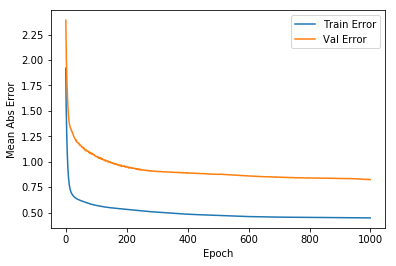

In [8]:
trainNNs(train)

# Test Time Functions

In [9]:
def copy_model(model):
    batch_model = keras.models.clone_model(model)
    batch_model.build((None, len(constants.CONTINUOUS_TRAINING_FEATURES)))
    batch_model.compile(optimizer='adam', loss='mean_absolute_error')
    batch_model.set_weights(model.get_weights())
    
    return batch_model

def predictOneDataPoint(X):
    label = X.pop('next_pm_2.5')
    X1 = np.array(X[constants.CONTINUOUS_TRAINING_FEATURES])
    X2 = np.array(X[constants.CONTINUOUS_TRAINING_FEATURES_W_PREV])
    online_pred = online_model.predict(X1)
    batch_pred = batch_model.predict(X1)
    online_w_prev_pred = online_model_w_prev.predict(X2)
    par_pred = par_model.predict(X1)
    
    return (online_pred[0], online_w_prev_pred[0], batch_pred[0], par_pred[0], label.iloc[0])
    

def getFullPredictions(data):
    online_predictions = []
    online_w_prev_predictions = []
    batch_predictions = []
    ensemble = []
    par_predictions = []
    baseline_predictions = []
    all_labels = []
       
    for i in range(len(data)):
#     for i in range(1522, 1523):
        print(i)
        newData = data.iloc[[i]]
        
        online_pred, online_w_prev_pred, batch_pred, par_pred, label = predictOneDataPoint(newData)
        online_predictions.append(online_pred)
        par_predictions.append(par_pred)
        online_w_prev_predictions.append(online_w_prev_pred)
        batch_predictions.append(batch_pred)
        
        ensemble_pred = (.5 * online_pred) + (.5 * online_w_prev_pred)
        
        ensemble.append(ensemble_pred)
        all_labels.append(label)
        updateModels(newData, label)
    return (online_predictions, online_w_prev_predictions, batch_predictions, ensemble, all_labels, par_predictions)


In [10]:
batch_model = copy_model(online_model)
online_preds, online_w_prev_preds, batch_predictions, ensemble_preds, labels, par_preds = getFullPredictions(valid)
print(mean_absolute_error(online_preds, labels))
print(mean_absolute_error(online_w_prev_preds, labels))
print(mean_absolute_error(batch_predictions, labels))
print(mean_absolute_error(ensemble_preds, labels))
print(mean_absolute_error(par_preds, labels))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [11]:
np.mean(np.abs(np.diff(labels)))


0.34060598471941234

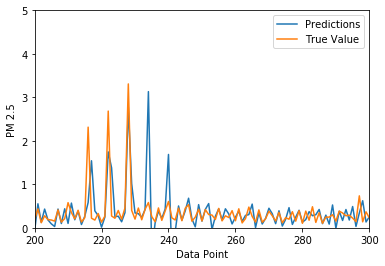

In [14]:
def plot_preds(preds, labels):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

    x = range(len(preds))
    plt.figure()
    plt.xlabel('Data Point')
    plt.ylabel('PM 2.5')
    plt.plot(x, preds,
           label='Predictions')
    plt.plot(x, labels,
           label = 'True Value')
    plt.ylim([0,5])
    plt.xlim([200, 300])
    plt.legend()

    plt.show()

plot_preds(online_w_prev_preds, labels)
